<a href="https://colab.research.google.com/github/sberniz/DS-Unit-4-Sprint-1-NLP/blob/main/module4-topic-modeling/Santiago_Berniz_LS_DS_414_Topic_Modeling_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 3.4MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180944 sha256=648ea0650aa9ffe119338f07a0c6a9494d652e93953b02b304c8f467c3df0406
  Stored in directory: /tmp/pip-ephem-wheel-cache-pedk9cgz/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [1]:
import numpy as np
import gensim
import os
import re
from ast import literal_eval

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd
import tqdm
from tqdm import tqdm
import spacy
nlp = spacy.load('en_core_web_lg')

In [4]:
df = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [5]:
df['reviews.text'][111]

"Thats a whole lot of batteries! I ordered the 48 pack of AA batteries and its so much cheaper than a much smaller branded pack from the big chain stores. They arrived packaged well and wrapped nicely, see included pictures for details. I like to keep extra batteries around because most new electronics do not have included batteries these days. I hate getting a device in the mail and scavenging the house for batteries or stealing them from the remote controls. At this price, we can all afford to keep a bunch on hand. Ive tested these on several devices so far and they appear to be comparable to brand name batteries, they last a long time and bring all my electronics to life with renewed vigor. I'll definitely be buying more in the future."

In [6]:
df.shape

(28332, 24)

In [17]:
def get_lemmas(text):
  STOP_WORDS = nlp.Defaults.stop_words.union(['batteries','i', 'amazon', 'i','it', "it's", 'it.', 'the', 'this',"i'll","ive"])
  lemmas = []
  doc = nlp(text)
  for token in doc: 
    if ((token.text.lower() not in STOP_WORDS) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
      lemmas.append(token.lemma_.lower())
    
  return lemmas

In [18]:
STOP_WORDS = nlp.Defaults.stop_words.union(['ordered','order','batteries','i', 'amazon', 'i','it', "it's", 'it.', 'the', 'this',"i'll","ive"])

In [11]:
def remove_stops(__list__):
  keywords = []

  for keyword in __list__:
    phrase = []

    words = keyword.split()

    for word in words:
      if word in STOP_WORDS:
        pass
      else:
        phrase.append(word)
    phrase = ' '.join(phrase)

    if len(phrase) > 0:
      keywords.append(phrase)
  return keywords

In [15]:
tqdm.pandas()
df['keywords'] = df['reviews.text'].progress_apply(get_lemmas)

100%|██████████| 28332/28332 [06:07<00:00, 77.18it/s]


In [19]:
df['keywords'][0]

['order',
 '3',
 'item',
 'bad',
 'quality',
 'miss',
 'backup',
 'spring',
 'pc',
 'aluminum',
 'battery',
 'work']

In [21]:
id2word = corpora.Dictionary(df['keywords'])

In [24]:
id2word.token2id['work']

11

In [25]:
len(id2word.keys())

8827

In [26]:
id2word.filter_extremes(no_below=5, no_above=0.85)

In [27]:
corpus = [id2word.doc2bow(text) for text in df['keywords']]

In [30]:
lda= LdaMulticore(corpus=corpus,
                  id2word=id2word,
                  num_topics=20,
                  passes=50,
                  workers=12)

In [ ]:
lda.print_topics(20)

In [36]:
words = [re.findall(r'"[^"]*"', t[1]) for t in lda.print_topics(20)]

In [37]:
topics =[', '.join(t[0:5])for t in words]

In [38]:
topic_labels = [', '.join(t[0:5]) for t in words]

In [39]:
for id, t in enumerate(topics):
  print(f"----Topic {id}------")
  print(t,end="\n\n")

----Topic 0------
"-pron-", "love", "buy", "kindle", "game"

----Topic 1------
"great", "price", "good", "battery", "product"

----Topic 2------
"deal", "long", "great", "gift", "excellent"

----Topic 3------
"-pron-", "old", "year", "love", "tablet"

----Topic 4------
"user", "child", "friendly", "great", "learn"

----Topic 5------
"-pron-", "music", "use", "sound", "alexa"

----Topic 6------
"fire", "kindle", "-pron-", "hd", "8"

----Topic 7------
"tablet", "great", "good", "feature", "price"

----Topic 8------
"buy", "-pron-", "good", "recommend", "purchase"

----Topic 9------
"battery", "brand", "-pron-", "long", "use"

----Topic 10------
"card", "storage", "gb", "memory", "sd"

----Topic 11------
"-pron-", "charge", "use", "enjoy", "tablet"

----Topic 12------
"-pron-", "kindle", "device", "screen", "read"

----Topic 13------
"kid", "-pron-", "tablet", "app", "great"

----Topic 14------
"like", "come", "small", "read", "need"

----Topic 15------
"great", "work", "product", "camera

In [40]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.8MB/s 
     |████████████████████████████████| 552kB 40.4MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=85a05a6d8fd08f31a67b53e80bc4d10d837cb95420bad041d8a72a3a23837c30
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=097fa49fff785e76d9ac332032f60ae7c95d484e884a62aa45ac15d213d2d937
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [41]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [42]:
pyLDAvis.gensim.prepare(lda,corpus,id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.072946  0.057633       1        1  17.647411
3      0.144688 -0.237897       2        1   7.535050
12     0.160108  0.138802       3        1   6.487129
13     0.066447 -0.050522       4        1   6.406585
1     -0.349641 -0.078652       5        1   6.245013
0      0.223583 -0.165198       6        1   5.892640
17     0.104766  0.053489       7        1   5.309786
16    -0.005722  0.081408       8        1   4.983847
19    -0.041021  0.097342       9        1   4.392973
6      0.119326 -0.036014      10        1   4.270198
8     -0.053287 -0.210942      11        1   4.011134
5      0.069273  0.078153      12        1   3.612159
18    -0.131755  0.036618      13        1   3.571853
7     -0.188507 -0.023982      14        1   3.254146
14     0.077923  0.216823      15        1   3.252275
11     0.145681 -0.122058      16        1   2.896148
10     0.025780  0.124984      17        1   2.703901
2     -0.185310 -0.120903      18        1   2.534942
15    -0.052889  0.096246      19        1   2.500313
4     -0.056499  0.064671      20        1   2.492503, topic_info=          Term          Freq         Total Category  logprob  loglift
3      battery   9361.000000   9361.000000  Default  30.0000  30.0000
10        work   4110.000000   4110.000000  Default  29.0000  29.0000
20       great   9142.000000   9142.000000  Default  28.0000  28.0000
18       price   4968.000000   4968.000000  Default  27.0000  27.0000
72      -pron-  16020.000000  16020.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
2143  download     75.183411    872.091187  Topic20  -4.6744   1.2409
30        good    108.219955   6610.908691  Topic20  -4.3102  -0.4204
1997    tablet     86.234337   7926.360352  Topic20  -4.5373  -0.8290
72      -pron-     73.860214  16020.808594  Topic20  -4.6922  -1.6876
1569      ipad     55.211899    935.548523  Topic20  -4.9832   0.8619

[1394 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
2302      3  0.056306       $
2302      4  0.009384       $
2302      8  0.621714       $
2302      9  0.018769       $
2302     10  0.159534       $
...     ...       ...     ...
1049      2  0.990737      yr
1049     17  0.004270      yr
2226     15  0.889725  zipper
1278     10  0.927906    zone
2841     13  0.943719       ©

[3668 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 4, 13, 14, 2, 1, 18, 17, 20, 7, 9, 6, 19, 8, 15, 12, 11, 3, 16, 5])

In [43]:
distro =[lda[doc] for doc in corpus]

In [44]:
distro[0]

[(9, 0.46144092), (12, 0.14658107), (15, 0.18403167), (18, 0.1412797)]

In [47]:
def update(doc):
    d_dist = {k:0 for k in range(0,20)}
    for t in doc:
        d_dist[t[0]] = t[1]
    return d_dist

new_distro = [update(doc) for doc in distro] 

In [48]:
topicsdf = pd.DataFrame.from_records(new_distro)
topicsdf.columns = topic_labels

In [49]:
topicsdf.head()

,"""-pron-"", ""love"", ""buy"", ""kindle"", ""game""","""great"", ""price"", ""good"", ""battery"", ""product""","""deal"", ""long"", ""great"", ""gift"", ""excellent""","""-pron-"", ""old"", ""year"", ""love"", ""tablet""","""user"", ""child"", ""friendly"", ""great"", ""learn""","""-pron-"", ""music"", ""use"", ""sound"", ""alexa""","""fire"", ""kindle"", ""-pron-"", ""hd"", ""8""","""tablet"", ""great"", ""good"", ""feature"", ""price""","""buy"", ""-pron-"", ""good"", ""recommend"", ""purchase""","""battery"", ""brand"", ""-pron-"", ""long"", ""use""","""card"", ""storage"", ""gb"", ""memory"", ""sd""","""-pron-"", ""charge"", ""use"", ""enjoy"", ""tablet""","""-pron-"", ""kindle"", ""device"", ""screen"", ""read""","""kid"", ""-pron-"", ""tablet"", ""app"", ""great""","""like"", ""come"", ""small"", ""read"", ""need""","""great"", ""work"", ""product"", ""camera"", ""expect""","""tablet"", ""-pron-"", ""app"", ""ipad"", ""google""","""easy"", ""use"", ""read"", ""book"", ""light""","""work"", ""great"", ""far"", ""tablet"", ""use""","""tablet"", ""nice"", ""movie"", ""watch"", ""great"""
0,0.0000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.461441,0.0000,0.0000,0.146581,0.0000,0.0000,0.184032,0.0000,0.0000,0.14128,0.0000
1,0.0000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.841667,0.0000,0.0000,0.000000,0.0000,0.0000,0.000000,0.0000,0.0000,0.00000,0.0000
2,0.0125,0.208950,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.289848,0.288702,0.0125,0.0125,0.012500,0.0125,0.0125,0.012500,0.0125,0.0125,0.01250,0.0125
3,0.0000,0.375593,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.444407,0.0000,0.0000,0.000000,0.0000,0.0000,0.000000,0.0000,0.0000,0.01000,0.0000
4,0.0000,0.810000,0.0100,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.010000,0.0000,0.0000,0.000000,0.0000,0.0000,0.000000,0.0000,0.0000,0.00000,0.0000


In [51]:
df['primary_topic'] =topicsdf.idxmax(axis=1)

In [52]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,keywords,primary_topic
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-03-02T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht...","[order, 3, item, bad, quality, miss, backup, s...","""battery"", ""brand"", ""-pron-"", ""long"", ""use"""
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-08-31T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht...","[bulk, expensive, way, product, like]","""battery"", ""brand"", ""-pron-"", ""long"", ""use"""
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-12-06T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht...","[duracell, price, happy]","""buy"", ""-pron-"", ""good"", ""recommend"", ""purchase"""
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-03-28T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht...","[work, brand, battery, price]","""battery"", ""brand"", ""-pron-"", ""long"", ""use"""
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-04-22T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht...","[battery, long, price, great]","""great"", ""price"", ""good"", ""battery"", ""product"""


In [76]:
pvtable = pd.pivot_table(df,values=['reviews.text'],
                     index=['primary_topic'],
                     columns=['reviews.rating'],
                     aggfunc='count')

In [77]:
pvtable

reviews.text  ...        
reviews.rating                                              1  ...       5
primary_topic                                                  ...        
"-pron-", "charge", "use", "enjoy", "tablet"             24.0  ...   359.0
"-pron-", "kindle", "device", "screen", "read"           40.0  ...   467.0
"-pron-", "love", "buy", "kindle", "game"                14.0  ...  1666.0
"-pron-", "music", "use", "sound", "alexa"                8.0  ...   415.0
"-pron-", "old", "year", "love", "tablet"                10.0  ...  1691.0
"battery", "brand", "-pron-", "long", "use"             650.0  ...  3608.0
"buy", "-pron-", "good", "recommend", "purchase"         22.0  ...   795.0
"card", "storage", "gb", "memory", "sd"                   9.0  ...   231.0
"deal", "long", "great", "gift", "excellent"             25.0  ...   817.0
"easy", "use", "read", "book", "light"                    9.0  ...  1080.0
"fire", "kindle", "-pron-", "hd", "8"                    15.0  ...   679.0
"great", "price", "good", "battery", "product"           12.0  ...  3393.0
"great", "work", "product", "camera", "expect"           17.0  ...   514.0
"kid", "-pron-", "tablet", "app", "great"                17.0  ...  1080.0
"like", "come", "small", "read", "need"                  17.0  ...   319.0
"tablet", "-pron-", "app", "ipad", "google"              41.0  ...   383.0
"tablet", "great", "good", "feature", "price"             8.0  ...   588.0
"tablet", "nice", "movie", "watch", "great"               NaN  ...   678.0
"user", "child", "friendly", "great", "learn"            18.0  ...   194.0
"work", "great", "far", "tablet", "use"                   9.0  ...   940.0

[20 rows x 5 columns]

In [81]:
pvtable = pvtable.reset_index()

In [82]:
pvtable

primary_topic  ... reviews.text
reviews.rating                                                    ...            5
0                   "-pron-", "charge", "use", "enjoy", "tablet"  ...        359.0
1                 "-pron-", "kindle", "device", "screen", "read"  ...        467.0
2                      "-pron-", "love", "buy", "kindle", "game"  ...       1666.0
3                     "-pron-", "music", "use", "sound", "alexa"  ...        415.0
4                      "-pron-", "old", "year", "love", "tablet"  ...       1691.0
5                    "battery", "brand", "-pron-", "long", "use"  ...       3608.0
6               "buy", "-pron-", "good", "recommend", "purchase"  ...        795.0
7                        "card", "storage", "gb", "memory", "sd"  ...        231.0
8                   "deal", "long", "great", "gift", "excellent"  ...        817.0
9                         "easy", "use", "read", "book", "light"  ...       1080.0
10                         "fire", "kindle", "-pron-", "hd", "8"  ...        679.0
11                "great", "price", "good", "battery", "product"  ...       3393.0
12                "great", "work", "product", "camera", "expect"  ...        514.0
13                     "kid", "-pron-", "tablet", "app", "great"  ...       1080.0
14                       "like", "come", "small", "read", "need"  ...        319.0
15                   "tablet", "-pron-", "app", "ipad", "google"  ...        383.0
16                 "tablet", "great", "good", "feature", "price"  ...        588.0
17                   "tablet", "nice", "movie", "watch", "great"  ...        678.0
18                 "user", "child", "friendly", "great", "learn"  ...        194.0
19                       "work", "great", "far", "tablet", "use"  ...        940.0

[20 rows x 6 columns]

In [83]:
pvtable.columns = ['primary_topic','very poor','poor','neutral','good','excellent']
pvtable.head()

,primary_topic,very poor,poor,neutral,good,excellent
0,"""-pron-"", ""charge"", ""use"", ""enjoy"", ""tablet""",24.0,32.0,31.0,161.0,359.0
1,"""-pron-"", ""kindle"", ""device"", ""screen"", ""read""",40.0,19.0,49.0,231.0,467.0
2,"""-pron-"", ""love"", ""buy"", ""kindle"", ""game""",14.0,6.0,38.0,419.0,1666.0
3,"""-pron-"", ""music"", ""use"", ""sound"", ""alexa""",8.0,19.0,29.0,199.0,415.0
4,"""-pron-"", ""old"", ""year"", ""love"", ""tablet""",10.0,15.0,67.0,428.0,1691.0


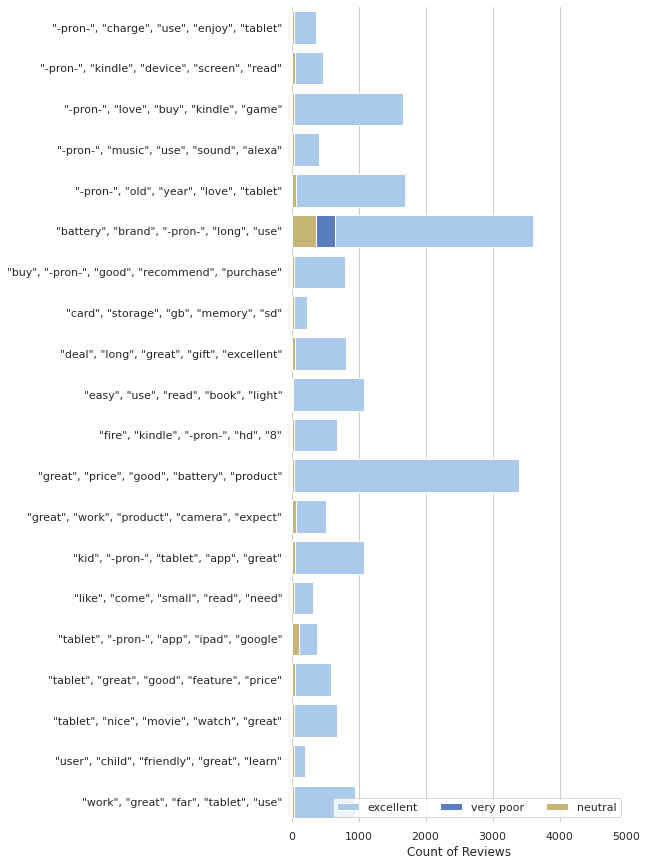

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

sns.set_color_codes('pastel')
sns.barplot(x='excellent', y='primary_topic', data=pvtable, label="excellent", color="b")

sns.set_color_codes('muted')
sns.barplot(x='very poor', y='primary_topic', data=pvtable, label="very poor", color="b")

sns.set_color_codes('muted')
sns.barplot(x='neutral', y='primary_topic', data=pvtable, label="neutral", color="y")

ax.legend(ncol=3, loc="lower right", frameon=True)
ax.set(xlim=(0,5000), ylabel="", xlabel="Count of Reviews")
sns.despine(left=True, bottom=True)

# Findings

- Most amazon Comments are excellent
- most common products are electronics since tops are tablet
- price and quality are main topics for the reviews.

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling